In [471]:
import os
import re
import json
import numpy as np
from dotenv import load_dotenv
from sentence_transformers import SentenceTransformer
from google import genai
from google.genai import types
from concurrent.futures import ThreadPoolExecutor, as_completed
from itertools import chain
import random

import matplotlib.pyplot as plt
import numpy as np



In [472]:

load_dotenv()

API_KEY = os.getenv("GEMINI_API_KEY")

client = genai.Client(api_key=API_KEY)


default_model = "gemini-2.5-flash-lite"
pro_model = "gemini-2.5-pro"


In [473]:
# # --- 1. Define the Data ---
# # Create an array of ages from 0 to 30
# age_years = np.linspace(0, 30, 300)

# # Use an arctan-based function to approximate the S-shaped growth curve.
# # This formula is tuned to match the curve shape and the key points A, B, C.
# # max_mass / (1 + exp(-k * (age - inflection_point))) is the standard
# # logistic function, which is a better fit, but for simple replication,
# # we'll use a manually tuned polynomial/sigmoid approximation or simpler logistic form.

# # Let's use a standard logistic function form, tuned to the graph:
# max_mass = 5700
# inflection_age = 17.5 # Age at the steepest point (near B)
# growth_rate = 0.5    # Steepness of the curve

# mass_kg = max_mass / (1 + np.exp(-growth_rate * (age_years - inflection_age)))

# # Define the coordinates for the labeled points A, B, and C
# # A: ~12 years, ~900 kg
# # B: ~16.5 years, ~3000 kg (Inflection point is slightly after this)
# # C: ~20 years, ~5200 kg
# points_age = np.array([12, 18, 20])
# points_mass = max_mass / (1 + np.exp(-growth_rate * (points_age - inflection_age)))

# # Adjust the 'B' point to exactly match the 3000 kg line in the image
# points_mass[1] = 3000
# points_age[1] = 17.5 # Adjust age slightly if necessary, but keep it near 16.5

# # --- 2. Create the Plot ---
# plt.figure(figsize=(8, 6))

# # Plot the T. rex growth curve
# plt.plot(age_years, mass_kg, color='#307FBC', linewidth=2.5)

# # Plot the labeled points A, B, C
# plt.scatter(points_age, points_mass, color='black', s=50, zorder=5)

# # Add labels to the points
# labels = ['A', 'B', 'C']
# offsets = [(0, 10), (0, 10), (0, 10)] # Offset the labels slightly above the points

# for i, txt in enumerate(labels):
#     plt.annotate(txt, (points_age[i], points_mass[i]),
#                  textcoords="offset points", xytext=offsets[i], ha='center', fontsize=12, fontweight='bold')


# # --- 3. Customize Axes and Grid ---
# # Set the x-axis (age) limits and ticks
# plt.xlim(0, 30)
# plt.xticks(np.arange(0, 31, 5), fontsize=10)
# plt.xlabel('age (years)', fontsize=12)

# # Set the y-axis (mass) limits and ticks
# plt.ylim(0, 6000)
# # Ticks are 0, 1000, 2000, 3000, 4000, 5000, 6000
# plt.yticks(np.arange(0, 6001, 1000), fontsize=10)
# plt.ylabel('mass (kg)', fontsize=12)

# # Add the horizontal grid lines shown in the image
# # We'll use a lighter gray color and the same major ticks
# plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

# # --- 4. Add Title and Final Touches ---
# plt.title('Tyrannosaurus rex Mass (kg) by Age (years)', fontsize=14, fontweight='normal')

# # Remove the top and right spines (border lines)
# ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # Make sure the axes cross at (0, 0)
# ax.axhline(0, color='black', linewidth=1)
# ax.axvline(0, color='black', linewidth=1)

# # Ensure tight layout and display the plot
# plt.tight_layout()
# plt.show()

In [474]:
data = """
Question: 
    What is the percentage change of the t-rex mass at 17.5 years of age compared to at 12 years of age.
    A. 1
    B. 2
    c. 3

Correct answer 3.

 --- 1. Define the Data ---
# Create an array of ages from 0 to 30
age_years = np.linspace(0, 30, 300)

# Use an arctan-based function to approximate the S-shaped growth curve.
# This formula is tuned to match the curve shape and the key points A, B, C.
# max_mass / (1 + exp(-k * (age - inflection_point))) is the standard
# logistic function, which is a better fit, but for simple replication,
# we'll use a manually tuned polynomial/sigmoid approximation or simpler logistic form.

# Let's use a standard logistic function form, tuned to the graph:
max_mass = 5700
inflection_age = 17.5 # Age at the steepest point (near B)
growth_rate = 0.5    # Steepness of the curve

mass_kg = max_mass / (1 + np.exp(-growth_rate * (age_years - inflection_age)))

# Define the coordinates for the labeled points A, B, and C
# A: ~12 years, ~900 kg
# B: ~16.5 years, ~3000 kg (Inflection point is slightly after this)
# C: ~20 years, ~5200 kg
points_age = np.array([12, 18, 20])
points_mass = max_mass / (1 + np.exp(-growth_rate * (points_age - inflection_age)))

# Adjust the 'B' point to exactly match the 3000 kg line in the image
points_mass[1] = 3000
points_age[1] = 17.5 # Adjust age slightly if necessary, but keep it near 16.5

# --- 2. Create the Plot ---
plt.figure(figsize=(8, 6))

# Plot the T. rex growth curve
plt.plot(age_years, mass_kg, color='#307FBC', linewidth=2.5)

# Plot the labeled points A, B, C
plt.scatter(points_age, points_mass, color='black', s=50, zorder=5)

# Add labels to the points
labels = ['A', 'B', 'C']
offsets = [(0, 10), (0, 10), (0, 10)] # Offset the labels slightly above the points

for i, txt in enumerate(labels):
    plt.annotate(txt, (points_age[i], points_mass[i]),
                 textcoords="offset points", xytext=offsets[i], ha='center', fontsize=12, fontweight='bold')


# --- 3. Customize Axes and Grid ---
# Set the x-axis (age) limits and ticks
plt.xlim(0, 30)
plt.xticks(np.arange(0, 31, 5), fontsize=10)


plt.xlabel('age (years)', fontsize=12)

# Set the y-axis (mass) limits and ticks
plt.ylim(0, 6000)
# Ticks are 0, 1000, 2000, 3000, 4000, 5000, 6000
plt.yticks(np.arange(0, 6001, 1000), fontsize=10)
plt.ylabel('mass (kg)', fontsize=12)

# Add the horizontal grid lines shown in the image
# We'll use a lighter gray color and the same major ticks
plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

# --- 4. Add Title and Final Touches ---
plt.title('Tyrannosaurus rex Mass (kg) by Age (years)', fontsize=14, fontweight='normal')

# Remove the top and right spines (border lines)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make sure the axes cross at (0, 0)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Ensure tight layout and display the plot
plt.tight_layout()
plt.show()
"""

system_msg = """
    Return 
"""

# Randomizing content

In [475]:
import random

In [476]:
# func = [
#     'A*x',            # linjär
#     'A*x**2',         # kvadratisk
#     'A*x**3',         # kubisk
#     'A*np.sin(x)',    # sinus
#     'A*np.cos(x)',    # cosinus
#     'A*np.tan(x)',    # tangens (var försiktig med asymptoter)
#     'A*np.exp(x)',    # exponentiell
#     'A*np.log(x + 1)',# logaritm (x+1 för att undvika log(0))
#     'A*np.sqrt(x)',   # kvadratroten
#     'A / (1 + np.exp(-x))', # sigmoidfunktion
#     'A*np.abs(x)',    # absolutbelopp
# ]

# number_ranges = [
#     np.array([-10, -5]),
#     np.array([-5, 0]),
#     np.array([0, 5]),
#     np.array([5, 10]),
#     np.array([-10, 10]),
#     np.array([5, 10]),
#     np.array([2, 4]),
#     np.array([3, 5]),
#     np.array([4, 6]),
#     np.array([5, 7]),
#     np.array([6, 8]),
#     np.array([7, 9]),
#     np.array([8, 10]),
#     np.array([9, 11]),
#     np.array([-4, -2]),
#     np.array([-6, -3]),
#     np.array([-8, -4]),
#     np.array([-9, -6]),
#     np.array([-12, -8]),
#     np.array([-2, 2]),
#     np.array([-3, 3]),
#     np.array([-5, 5]),
#     np.array([-7, 4]),
#     np.array([-4, 6]),
#     np.array([-9, 3]),
#     np.array([-20, -10]),
#     np.array([10, 20]),
#     np.array([-15, 5]),
#     np.array([-5, 15]),
#     np.array([-30, 30])
# ]

# magnitudes = [0.01, 0.1, 1, 10, 100, 1000, 1e6]

# topics = [
#     "Finance and investments",
#     "Population growth",
#     "Age of dinosaurs",
#     "Climate change trends",
#     "Company profits over time",
#     "Height growth of children",
#     "Car speed and distance",
#     "Sales performance",
#     "Temperature variations",
#     "COVID-19 cases over time",
# ]


# # print(len(func), len(magnitude), len(topics))
# print(np.array([-30, 30])*magnitudes[0])
# f = random.sample(func, 1)
# magnitude = random.sample(magnitudes, 1)
# r = random.sample(number_ranges, 1)
# print(r, magnitude)
# r = r[0]*magnitude[0]
# print(r)
# topic = random.sample(topics, 1)

# sampled_content = [f, r, topic]
# print(sampled_content)
# # with open("hp.json", "r", encoding="utf-8") as f:
# #     data = json.load(f)

# texts = []

# def extract_json_from_text(text):
#     """Extract and parse JSON array from model text output"""
#     json_match = re.search(r'\[.*\]', text, re.DOTALL)
#     if not json_match:
#         print("No JSON array found in text")
#         return []

#     json_str = json_match.group(0)
#     try:
#         data = json.loads(json_str)
#         return data if isinstance(data, list) else [data]
#     except json.JSONDecodeError:
#         items = re.findall(r'\{[^{}]+\}', text, re.DOTALL)
#         parsed = []
#         for item in items:
#             try:
#                 parsed.append(json.loads(item))
#             except:
#                 continue
#         return parsed


# model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = model.encode([t["text"] for t in texts], normalize_embeddings=True)


# def retrieve_section():
#     """Return all chunks from a specific section """
#     return texts


# DATA_DIR = "."


# def _load_json(filename):
#     path = os.path.join(DATA_DIR, filename)
#     with open(path, "r", encoding="utf-8") as f:
#         data = json.load(f)
#     if isinstance(data, dict) and "items" in data:
#         return data["items"]
#     if isinstance(data, list):
#         return data
#     return []


# def _truncate(s, n):
#     return s if len(s) <= n else s[:n] + "..."


# def _build_context_block(name, docs, max_items=24, max_char_per_item=320):
#     lines = [f"{name}—referensutdrag:"]
#     for i, d in enumerate(docs[:max_items]):
#         sect = d.get("section", name.upper())
#         txt = d.get("text") or d.get("question") or d.get("body") or ""
#         lines.append(f"{i+1}. [{sect}] {_truncate(str(txt), max_char_per_item)}")
#     return "\n".join(lines)


# def _load_all_refs():
#     xyz_refs = _load_json("test_data.json")
#     return xyz_refs

# # -------------------------------
# # JSON Schemas (ENFORCEMENT)  # NEW
# # -------------------------------
# xyz_schema = {
#   "type": "array",
#   "minItems": 1, "maxItems": 1,
#   "items": {
#     "type": "object",
#     "properties": {
#       "id":   {"type": "string"},
#       "type": {"type": "string"},
#       "subtype": {"type": "string"},

#       "x_plot": {
#             "type": "array",
#             "items": { "type": "integer" }
#       },

#       "y_plot":{
#             "type": "array",
#             "items": { "type": "integer" }
#       },

#       "x_points":{
#             "type": "array",
#             "items": { "type": "integer" }
#       },
#       "y_points":{
#             "type": "array",
#             "items": { "type": "integer" }
#       },

#       "labels":{
#             "type": "array",
#             "items": { "type": "string" }
#       },

#       "title":{"type": "string"},
#       "x_label":{"type": "string"},
#       "y_label":{"type": "string"},

      
#       "question": {"type": "string"},
#       "explanation1": {"type": "string"},
#       "explanation2": {"type": "string"},
#       "answer1": {"type": "integer"},
#       "answer2": {"type": "integer"},
#       "options1": {
#         "type": "array",
#         "minItems": 3, "maxItems": 3,
#         "items": {"type": "string"}
#       },
#       "options2": {
#         "type": "array",
#         "minItems": 3, "maxItems": 3,
#         "items": {"type": "string"}
#       },
#       "difficulty":{"type": "string"}

#     }, 
#     "required": ["id","type", "subtype", "x_plot", "y_plot", "x_points", "y_points", "title","x_label", "y_label", "question","explanation1", "explanation2","answer1", "answer2","options2", "options2"]
#   }
# }

# system_msg = f"""
# You are generating GMAT-style **Data Interpretation** questions focused on **graph interpretation**.  
# Your output must strictly follow this format and constraints:

# - Return ONLY a single JSON array containing exactly one object. No extra text outside the JSON.
# - Use these variables for question generation:  
#     type of graph: {sampled_content[0]}  
#     type of range: {sampled_content[1]}  
#     type of topic: {sampled_content[2]}
# - The object must follow this JSON schema with these required properties:

#   - "id": string, starting with "d1"
#   - "type": "Data"
#   - "subtype": "graph interpretation"
#   - "x_values": array of 100 numbers in the range specified above — the x-axis points (e.g. generated with np.linspace)
#   - "function": string describing the mathematical function used that comes from graph above
#   - "x_points": array of numbers for labeled points on the x-axis (e.g. special points like A, B, C) use maximum 3 points
#   - "y_points": array of numbers corresponding to x_points ( maximum 3 points)
#   - "labels": array of strings naming each labeled point
#   - "title": string — graph title
#   - "x_label": string — label for x-axis, a unique label
#   - "y_label": string — label for y-axis, a unique label, Make sure that x-label and y-label is not equal
#   - "question": string — contains two questions, separated clearly
#   - "explanation1": string — explanation of solution logic for first question
#   - "explanation2": string — explanation for second question
#   - "answer1": integer (0, 1, or 2) — index of correct option for first question
#   - "answer2": integer (0, 1, or 2) — index of correct option for second question
#   - "options1": array of exactly 3 strings — answer choices for first question
#   - "options2": array of exactly 3 strings — answer choices for second question
#   - "difficulty": string — "easy", "medium" or "hard"

# Create exactly one example question object.

# Before output:
# - Verify the correct answers correspond to options and answers.
# - Confirm output is a single JSON array with one object.

# Generate "y_values" by applying a mathematical function that involves multiplying "x_values" by a constant or other simple operation, matching the graph type and magnitude.

# If you do not want to use any of the arrays "x_points" or "y_points", set them to null.

# Return only the JSON array.
# """

# xyz_refs = _load_all_refs()    

# # Taking out random samples of our training data to get a better randomness in the question generation
# xyz_refs = random.sample(xyz_refs, k=len(xyz_refs)//2)

# print(f'xyz refs --------------------------------{xyz_refs}, length: {len(xyz_refs)}')

# ctx_xyz = _build_context_block("XYZ", xyz_refs, max_items=36, max_char_per_item=300)

# ctxs = ctx_xyz

# # Map each index to its schema  # NEW
# schemas = xyz_schema

# def generate(system_msg, ctx, schema):  # CHANGED: added schema
#     full_context = (
#         "Relevant information för nyproducerade frågor.\n"
#         "Använd som stil- och svårighetsguide. Kopiera inte text ordagrant.\n\n"
#         f"{ctx}"
#     )

#     full_message = (
#         full_context
#         + "\nSkapa nu frågorna enligt systeminstruktionen. "
#           "Håll dem på liknande svårighet och stil som referensen men gör dem nya."
#     )

#     contents = []
#     parts = []
#     if full_message:
#         parts.append(types.Part(text=full_message))
#     if parts:
#         contents.append(types.Content(role="user", parts=parts))

#     # CHANGED: structured output constraints
#     resp = client.models.generate_content(
#         model=default_model,
#         config=types.GenerateContentConfig(
#             system_instruction=system_msg,
#             response_mime_type="application/json",   # enforce JSON-only
#             response_schema=schema                   # enforce exact schema
#         ),
#         contents=contents,
#     )

#     # Prefer direct JSON text from the model; fallback to extractor if needed
#     raw_text = getattr(resp, "text", "") or ""
#     if not raw_text and isinstance(resp, list):
#         raw_text = "".join([m.text for m in resp if hasattr(m, "text") and m.text])

#     questions = []
#     if raw_text:
#         try:
#             questions = json.loads(raw_text)
#         except Exception:
#             questions = extract_json_from_text(raw_text)
#     return questions


# def all():
    
#     r = generate(system_msg, ctxs, schemas)
#     result = r
#     print(result)
#     with open("res.json", "w") as outfile:
#         json.dump(result, outfile, indent=2)
#     return result
    
# all()


In [477]:
# with open("res.json", "r") as f:
#     data = json.load(f)
# data=data[0]
# # print(data)

# x_plot = data["x_plot"]
# y_plot = data["y_plot"]

# x_points = data["x_points"]
# y_points = data["y_points"]

# title = data["title"]
# x_label = data["x_label"]
# y_label = data["x_label"]

# labels = data["labels"]
# # --- 2. Create the Plot ---
# plt.figure(figsize=(8, 6))
# # Plot the T. rex growth curve
# plt.plot(x_plot, y_plot, color='#307FBC', linewidth=2.5)
# # Plot the labeled points A, B, C
# # plt.scatter(x_points, y_points, color='black', s=50, zorder=5)


# # --- 3. Customize Axes and Grid ---
# # Set the x-axis (age) limits and ticks
# # plt.xlim(0, 30)
# # plt.xticks(x_axis, fontsize=10)
# plt.xlabel(x_label, fontsize=12)

# # Set the y-axis (mass) limits and ticks
# # plt.ylim(0, 6000)
# # Ticks are 0, 1000, 2000, 3000, 4000, 5000, 6000
# # plt.yticks(y_axis, fontsize=10)
# plt.ylabel(y_label, fontsize=12)


# # --- 4. Add Title and Final Touches ---
# plt.title(title, fontsize=14, fontweight='normal')

# for i, txt in enumerate(labels):
#     plt.annotate(txt, (points_age[i], points_mass[i]),
#                  textcoords="offset points", xytext=offsets[i], ha='center', fontsize=12, fontweight='bold')

# # Do not touch
# plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
# # Remove the top and right spines (border lines)
# ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # Make sure the axes cross at (0, 0)
# # ax.axhline(0, color='black', linewidth=1)
# # ax.axvline(0, color='black', linewidth=1)

# # Ensure tight layout and display the plot
# plt.tight_layout()
# plt.show()

# q = data["question"]
# o1 = data["options1"]
# o2 = data["options2"]
# a1 = data["answer1"]
# a2 = data["answer1"]

# print(q)
# print(o1)
# print(o2)
# print(a1)
# print(a2)

In [478]:

# # --- 1. Define the Data and Plot Parameters ---
# # Key: X = 10 students
# symbol = 'X' # Using 'X' to represent the bowtie symbol for simplicity

# # Counts from the image:
# count_only_left = 11  # '30 years or older' only
# count_intersection = 4 # Both '30 years or older' AND 'no high school diploma'
# count_only_right = 4  # 'no high school diploma' only
# count_outside = 10    # Students neither 30+ nor without diploma

# # Total students = (11 + 4 + 4 + 10) * 10 = 290 students

# # --- 2. Setup the Plotting Space ---
# plt.figure(figsize=(10, 6))
# ax = plt.gca()

# # Set up the boundaries for the diagram
# ax.set_xlim(0, 100)
# ax.set_ylim(0, 100)

# # Hide axes ticks and labels as they are not needed for a clean diagram
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis('off')

# # --- 3. Draw the Circles (Sets) ---
# center_left = (40, 50)
# center_right = (60, 50)
# radius = 30

# # Circle 1: '30 years of age or older'
# circle1 = plt.Circle(center_left, radius, color='black', fill=False, linewidth=1.5)
# ax.add_artist(circle1)
# plt.text(center_left[0], center_left[1] - radius - 5, '30 years of age\nor older',
#          ha='center', va='top', fontsize=12)

# # Circle 2: 'no high school diploma'
# circle2 = plt.Circle(center_right, radius, color='black', fill=False, linewidth=1.5)
# ax.add_artist(circle2)
# plt.text(center_right[0], center_right[1] - radius - 5, 'no high school\ndiploma',
#          ha='center', va='top', fontsize=12)


# # --- 4. Place the Symbols (X's) ---

# # Helper function to scatter symbols
# def plot_symbols(count, center_x, center_y, width, height, color='black'):
#     # Generate random positions within the defined box/region
#     # We use a fixed seed for reproducible symbol placement
#     np.random.seed(count)
#     x_positions = np.random.uniform(center_x - width / 2, center_x + width / 2, count)
#     y_positions = np.random.uniform(center_y - height / 2, center_y + height / 2, count)

#     for x, y in zip(x_positions, y_positions):
#         # Annotate with a text symbol. Using a triangle/bowtie symbol like '⋈' or simple 'X'
#         # Since the symbol in the image is a bowtie (hourglass), we will approximate it with text.
#         # We will use 'X' for simplicity as in the prompt's key, or an actual character:
#         plt.text(x, y, '$\u2388$', ha='center', va='center', fontsize=14, color=color) # U+2388: A more fitting bowtie symbol

# # Region 1: Only Left (30+ only)
# # Approximate bounding box for placing symbols in this region
# plot_symbols(count_only_left, 30, 50, 30, 50)

# # Region 2: Intersection (Both)
# plot_symbols(count_intersection, 50, 50, 10, 30)

# # Region 3: Only Right (No diploma only)
# plot_symbols(count_only_right, 70, 50, 20, 40)

# # Region 4: Outside (Neither)
# x_start_outside = 35
# y_outside = 85
# for i in range(count_outside):
#     plt.text(x_start_outside + i * 3.5, y_outside, '$\u2388$', ha='center', va='center', fontsize=14, color='black')


# # --- 5. Add the Key and Title ---
# # Key box
# key_x, key_y = 80, 75
# plt.plot([key_x - 5, key_x + 15, key_x + 15, key_x - 5, key_x - 5],
#          [key_y - 5, key_y - 5, key_y + 5, key_y + 5, key_y - 5],
#          color='black', linewidth=1)
# plt.text(key_x + 5, key_y, '$\u2388$ = 10 students', ha='center', va='center', fontsize=12)

# # Display the plot
# plt.tight_layout()
# plt.show()

In [479]:
def extract_json_from_text(text):
    """Extract and parse JSON array from model text output"""
    json_match = re.search(r'\[.*\]', text, re.DOTALL)
    if not json_match:
        print("No JSON array found in text")
        return []

    json_str = json_match.group(0)
    try:
        data = json.loads(json_str)
        return data if isinstance(data, list) else [data]
    except json.JSONDecodeError:
        items = re.findall(r'\{[^{}]+\}', text, re.DOTALL)
        parsed = []
        for item in items:
            try:
                parsed.append(json.loads(item))
            except:
                continue
        return parsed

In [ ]:
def polynomial(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e
def exponential(x, a, b, c, d, e):
    return a*np.exp(x)
def logarithmic(x, a, b, c, d, e):
    return a * np.log(b * x) + c
def logistic(x, L, k, x0, blank1, blank2):
    # L: The curve's maximum value (carrying capacity)
    # k: The steepness of the curve
    # x0: The x-value of the sigmoid's midpoint
    return L / (1 + np.exp(-k * (x - x0)))

func = [polynomial, exponential, logarithmic]
func = [logistic]

number_ranges = [
    np.array([0, 5]),
    np.array([5, 10]),
    np.array([5, 10]),
    np.array([2, 4]),
    np.array([3, 5]),
    np.array([4, 6]),
    np.array([5, 7]),
    np.array([6, 8]),
    np.array([7, 9]),
    np.array([8, 10]),
    np.array([9, 11]),
    np.array([10, 20])
]

magnitudes = [0.01, 0.1, 1, 10, 100, 1000, 1e6]

topics = [
    "Finance and investments",
    "Population growth",
    "Age of dinosaurs",
    "Climate change trends",
    "Company profits over time",
    "Height growth of children",
    "Car speed and distance",
    "Sales performance",
    "Temperature variations",
    "COVID-19 cases over time",
]

# print(len(func), len(magnitude), len(topics))
# print(np.array([-30, 30])*magnitudes[0])
function = random.sample(func, 1)
function = function[0]
magnitude = random.sample(magnitudes, 1)
range = random.sample(number_ranges, 1)
range = range[0]
# print(range, magnitude)
# range = range[0]*magnitude[0]
topic = random.sample(topics, 1)
topic = topic[0]

points_bool = random.rand()
points = np.random.randint(range[0], range[1], 3)


print(range, function, topic)
# coeff = np.random.uniform(-5, 5, 5)
coeff = x=np.random.randint(-5, 5, size=(5))
print(coeff)
# with open("hp.json", "r", encoding="utf-8") as f:
#     data = json.load(f)



[0 5] <function logistic at 0x13a70d640> Temperature variations
[-5 -3 -1  1 -4]


In [ ]:
# -------------------------------------------------------
# Input data
# -------------------------------------------------------


data = {
    "expression": function,
    "x_range": range,
    "context": topic,
    "point A": points[0],
    "point B": points[1],
    "point C": points[2]
}

prompt = f"""
Given the following description:

Expression: {data['expression']}
X-range: {data['x_range']}
Context: {data['context']}
Magnitude options: {magnitudes}


Generate appropriate:
1. Magnitude, choose a suitable magnitude regarding the context, and then multiply it to the range, also return the magnitude.
2. Matplotlib-style title, make sure to add context if it is needed, eg if the temperatures are in 1e6 add that they are related to the sun.
3. x-axis label, add a unit that makes sense to the magnitude and context
4. y-axis label, add a unit that makes sense to the magnitude and context


Return result as valid JSON with keys: title, xlabel, ylabel.
"""

In [482]:
texts = []

def extract_json_from_text(text):
    """Extract and parse JSON array from model text output"""
    json_match = re.search(r'\[.*\]', text, re.DOTALL)
    if not json_match:
        print("No JSON array found in text")
        return []

    json_str = json_match.group(0)
    try:
        data = json.loads(json_str)
        return data if isinstance(data, list) else [data]
    except json.JSONDecodeError:
        items = re.findall(r'\{[^{}]+\}', text, re.DOTALL)
        parsed = []
        for item in items:
            try:
                parsed.append(json.loads(item))
            except:
                continue
        return parsed


model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode([t["text"] for t in texts], normalize_embeddings=True)


def retrieve_section():
    """Return all chunks from a specific section """
    return texts


DATA_DIR = "."

def _load_json(filename):
    path = os.path.join(DATA_DIR, filename)
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    if isinstance(data, dict) and "items" in data:
        return data["items"]
    if isinstance(data, list):
        return data
    return []


def _truncate(s, n):
    return s if len(s) <= n else s[:n] + "..."


def _build_context_block(name, docs, max_items=24, max_char_per_item=320):
    lines = [f"{name}—referensutdrag:"]
    for i, d in enumerate(docs[:max_items]):
        sect = d.get("section", name.upper())
        txt = d.get("text") or d.get("question") or d.get("body") or ""
        lines.append(f"{i+1}. [{sect}] {_truncate(str(txt), max_char_per_item)}")
    return "\n".join(lines)


def _load_all_refs():
    xyz_refs = _load_json("labels.json")
    return xyz_refs

# -------------------------------
# JSON Schemas (ENFORCEMENT)  # NEW
# -------------------------------
xyz_schema = {
  "type": "array",
  "minItems": 1, "maxItems": 1,
  "items": {
    "type": "object",
    "properties": {
      "magnitude": {"type": "string"},
      "x_label": {"type": "string"},
      "y_label": {"type": "string"},
      "title": {"type": "string"}
      },
    "required": ["magnitude", "x_label", "y_label", "title"]
}
}

system_msg = prompt

schemas = xyz_schema

def generate(system_msg, schema):  

    full_message = (
        "\nCreate exactly one magnitude that relates to the context, one x label, one y label and one title, keep them all short and concise.#"
    )

    contents = []
    parts = []
    if full_message:
        parts.append(types.Part(text=full_message))
    if parts:
        contents.append(types.Content(role="user", parts=parts))

    # CHANGED: structured output constraints
    resp = client.models.generate_content(
        model=default_model,
        config=types.GenerateContentConfig(
            system_instruction=system_msg,
            response_mime_type="application/json",   # enforce JSON-only
            response_schema=schema                   # enforce exact schema
        ),
        contents=contents,
    )

    # Prefer direct JSON text from the model; fallback to extractor if needed
    raw_text = getattr(resp, "text", "") or ""
    if not raw_text and isinstance(resp, list):
        raw_text = "".join([m.text for m in resp if hasattr(m, "text") and m.text])

    questions = []
    if raw_text:
        try:
            questions = json.loads(raw_text)
        except Exception:
            questions = extract_json_from_text(raw_text)
    return questions


def all():
    
    r = generate(system_msg, schemas)
    result = r
    # print(result)
    with open("labels.json", "w") as outfile:
        json.dump(result, outfile, indent=2)
    return result
    
all()

[{'magnitude': '1',
  'x_label': 'Temperature (K)',
  'y_label': 'Probability',
  'title': 'Logistic Function of Temperature'}]

In [483]:
with open("labels.json", "r") as f:
    labels = json.load(f)

magnitude = float(labels[0]['magnitude'])
x_label = labels[0]['x_label']
y_label = labels[0]['y_label']
title = labels[0]['title']

x = np.linspace(range[0], range[1], 100) * magnitude
y = function(x, coeff[0], coeff[1], coeff[2], coeff[3], coeff[4])


In [ ]:

texts = []

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode([t["text"] for t in texts], normalize_embeddings=True)


def retrieve_section():
    """Return all chunks from a specific section """
    return texts


DATA_DIR = "."


def _load_json(filename):
    path = os.path.join(DATA_DIR, filename)
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    if isinstance(data, dict) and "items" in data:
        return data["items"]
    if isinstance(data, list):
        return data
    return []


def _truncate(s, n):
    return s if len(s) <= n else s[:n] + "..."


def _build_context_block(name, docs, max_items=24, max_char_per_item=320):
    lines = [f"{name}—referensutdrag:"]
    for i, d in enumerate(docs[:max_items]):
        sect = d.get("section", name.upper())
        txt = d.get("text") or d.get("question") or d.get("body") or ""
        lines.append(f"{i+1}. [{sect}] {_truncate(str(txt), max_char_per_item)}")
    return "\n".join(lines)


def _load_all_refs():
    xyz_refs = _load_json("test_data.json")
    return xyz_refs

# -------------------------------
# JSON Schemas (ENFORCEMENT)  # NEW
# -------------------------------

xyz_schema = {
  "type": "array",
  "minItems": 1, "maxItems": 1,
  "items": {
    "type": "object",
    "properties": {
      "id":   {"type": "string"},
      "type": {"type": "string"},
      "subtype": {"type": "string"},
      "question": {"type": "string"},
      "explanation1": {"type": "string"},
      "explanation2": {"type": "string"},
      "answer1": {"type": "integer"},
      "answer2": {"type": "integer"},
      "options1": {
        "type": "array",
        "minItems": 3, "maxItems": 3,
        "items": {"type": "string"}
      },
      "options2": {
        "type": "array",
        "minItems": 3, "maxItems": 3,
        "items": {"type": "string"}
      },
      "difficulty":{"type": "string"}

    }, 
    "required": ["id","type", "subtype", "question","explanation1", "explanation2","answer1", "answer2","options2", "options2"]
  }
}
if points_bool > 0.5:
    system_msg = f"""
    You are generating GMAT-style **Data Interpretation** questions focused on **graph interpretation**.  
    Your output must strictly follow this format and constraints:

    - Return ONLY a single JSON array containing exactly one object. No extra text outside the JSON.
    - Use these variables for question generation:  
    - The object must follow this JSON schema with these required properties:

    - "id": string, starting with "d1"
    - "type": "Data"
    - "subtype": "graph interpretation"
    - "question": string — contains two questions, separated clearly
    - "explanation1": string — explanation of solution logic for first question
    - "explanation2": string — explanation for second question
    - "answer1": integer (0, 1, or 2) — index of correct option for first question
    - "answer2": integer (0, 1, or 2) — index of correct option for second question
    - "options1": array of exactly 3 strings — answer choices for first question
    - "options2": array of exactly 3 strings — answer choices for second question
    - "difficulty": string — "easy", "medium" or "hard"

    Create exactly one example question object.

    Before output:
    - Verify the correct answers correspond to options and answers.
    - Confirm output is a single JSON array with one object.

    The question MUST relate to the graph, make sure that the answers are not to similar.
    x: {x}
    y: {y}


    x_label: {x_label}
    y_label: {y_label}
    title: {title}

    Return only the JSON array.
    """

else:
    system_msg = f"""
    You are generating GMAT-style **Data Interpretation** questions focused on **graph interpretation**.  
    Your output must strictly follow this format and constraints:

    - Return ONLY a single JSON array containing exactly one object. No extra text outside the JSON.
    - Use these variables for question generation:  
    - The object must follow this JSON schema with these required properties:

    - "id": string, starting with "d1"
    - "type": "Data"
    - "subtype": "graph interpretation"
    - "question": string — contains two questions, separated clearly
    - "explanation1": string — explanation of solution logic for first question
    - "explanation2": string — explanation for second question
    - "answer1": integer (0, 1, or 2) — index of correct option for first question
    - "answer2": integer (0, 1, or 2) — index of correct option for second question
    - "options1": array of exactly 3 strings — answer choices for first question
    - "options2": array of exactly 3 strings — answer choices for second question
    - "difficulty": string — "easy", "medium" or "hard"

    Create exactly one example question object.

    Before output:
    - Verify the correct answers correspond to options and answers.
    - Confirm output is a single JSON array with one object.

    The question MUST relate to the graph, make sure that the answers are not to similar.
    x: {x}
    y: {y}

    x_label: {x_label}
    y_label: {y_label}
    title: {title}

    Return only the JSON array.
    """

xyz_refs = _load_all_refs()    

# Taking out random samples of our training data to get a better randomness in the question generation
xyz_refs = random.sample(xyz_refs, k=len(xyz_refs)//2)

print(f'xyz refs --------------------------------{xyz_refs}, length: {len(xyz_refs)}')

ctx_xyz = _build_context_block("XYZ", xyz_refs, max_items=36, max_char_per_item=300)

ctxs = ctx_xyz

# Map each index to its schema  # NEW
schemas = xyz_schema

def generate(system_msg, ctx, schema):  # CHANGED: added schema
    full_context = (
        "Create 1 question that matches with the input data"
        f"{ctx}"
    )

    full_message = (
        full_context
        + "\nCreate the questgion according to the context "
    )

    contents = []
    parts = []
    if full_message:
        parts.append(types.Part(text=full_message))
    if parts:
        contents.append(types.Content(role="user", parts=parts))

    # CHANGED: structured output constraints
    resp = client.models.generate_content(
        # model=pro_model,
        model=default_model,
        config=types.GenerateContentConfig(
            system_instruction=system_msg,
            response_mime_type="application/json",   # enforce JSON-only
            response_schema=schema                   # enforce exact schema
        ),
        contents=contents,
    )

    # Prefer direct JSON text from the model; fallback to extractor if needed
    raw_text = getattr(resp, "text", "") or ""
    if not raw_text and isinstance(resp, list):
        raw_text = "".join([m.text for m in resp if hasattr(m, "text") and m.text])

    questions = []
    if raw_text:
        try:
            questions = json.loads(raw_text)
        except Exception:
            questions = extract_json_from_text(raw_text)
    return questions


def all():
    
    r = generate(system_msg, ctxs, schemas)
    result = r
    print(result)
    with open("res.json", "w") as outfile:
        json.dump(result, outfile, indent=2)
    return result
    
all()


NameError: name 'points_bool' is not defined

# Question

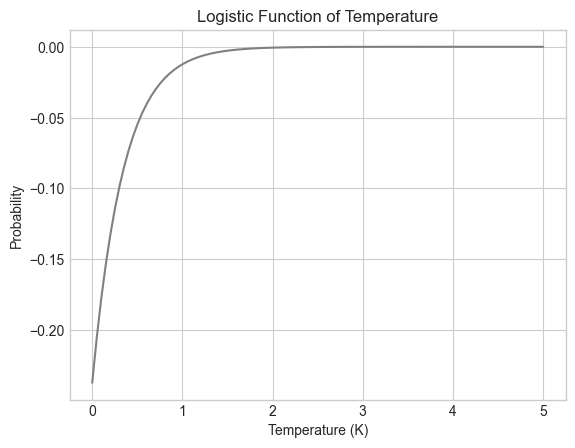

1. According to the graph, what is the approximate probability at 1.5 K?
2. What is the general trend of the probability as the temperature increases?
['-0.0000013 K', '-0.000013 K', '0.000013 K']
['Decreases', 'Increases', 'Stays constant']


In [485]:
plt.style.use('seaborn-v0_8-whitegrid') # A popular clean style
# Or try: 'ggplot', 'fivethirtyeight', 'dark_background', etc.

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.plot(x, y, color='gray')
plt.savefig("figures/image1")
plt.show()

with open("res.json", "r") as f:
    res = json.load(f)
res = res[0]

q = res['question']
o1 = res['options1']
o2 = res['options2']

print(q)
print(o1)
print(o2)

In [486]:
a1 = res['answer1']
a2 = res['answer2']
e1 = res['explanation1']
e2 = res['explanation2']

print(a1, a2)
print(e1)
print(e2)

1 0
To find the probability at 1.5 K, locate 1.5 on the x-axis (Temperature (K)) and find the corresponding value on the y-axis (Probability). The graph shows that at 1.5 K, the probability is approximately -0.000013 K.
Observe the graph from left to right. As the temperature (x-axis) increases, the probability (y-axis) consistently decreases. This indicates a negative correlation or a decreasing trend.


In [487]:
print(f'title: {title}, x-label: {x_label}, y-label: {y_label}')
print(f'x: {x}')
print(f'y: {y}')

title: Logistic Function of Temperature, x-label: Temperature (K), y-label: Probability
x: [0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09